In [1]:
import pandas as pd

# 文件名
input_file = "ChinaTemp.csv"
output_file = "ChinaTemp_processed.csv"

# 读取CSV文件
df = pd.read_csv(input_file)

# 显示原始列名
print("原始列名:", df.columns.tolist())

# 移除第一列（空列名）和最后一列（GeoReg）
# 检查第一列是否为空列名
if df.columns[0] == '':
    first_col_to_remove = ''
else:
    first_col_to_remove = df.columns[0]  # 否则使用实际的第一列名

# 移除第一列和GeoReg列
columns_to_keep = [col for col in df.columns if col != first_col_to_remove and col != 'GeoReg']
df_processed = df[columns_to_keep]

# 显示处理后的列名
print("处理后的列名:", df_processed.columns.tolist())

# 保存处理后的数据到新文件
df_processed.to_csv(output_file, index=False)

print(f"已将处理后的数据保存到 {output_file}")
print(f"原始数据: {df.shape[0]}行 x {df.shape[1]}列")
print(f"处理后数据: {df_processed.shape[0]}行 x {df_processed.shape[1]}列")

原始列名: ['Unnamed: 0', 'LB_T1', 'UB_T1', 'LB_T2', 'UB_T2', 'LB_T3', 'UB_T3', 'LB_T4', 'UB_T4', 'GeoReg']
处理后的列名: ['LB_T1', 'UB_T1', 'LB_T2', 'UB_T2', 'LB_T3', 'UB_T3', 'LB_T4', 'UB_T4']
已将处理后的数据保存到 ChinaTemp_processed.csv
原始数据: 899行 x 10列
处理后数据: 899行 x 8列


In [3]:
# 文件名
input_file = "ChinaTemp_processed.csv"
output_file = "ChinaTemp_final.csv"

# 读取CSV文件
df = pd.read_csv(input_file)

# 显示原始列名
print("原始列名:", df.columns.tolist())

# 定义新的列名
new_column_names = {
    'LB_T1': 'Season_1_lower',
    'UB_T1': 'Season_1_upper',
    'LB_T2': 'Season_2_lower',
    'UB_T2': 'Season_2_upper',
    'LB_T3': 'Season_3_lower',
    'UB_T3': 'Season_3_upper',
    'LB_T4': 'Season_4_lower',
    'UB_T4': 'Season_4_upper'
}

# 重命名列
df.rename(columns=new_column_names, inplace=True)

# 显示新的列名
print("新的列名:", df.columns.tolist())

# 保存修改后的数据到新文件
df.to_csv(output_file, index=False)

print(f"已将修改后的数据保存到 {output_file}")
print(f"数据: {df.shape[0]}行 x {df.shape[1]}列")

原始列名: ['LB_T1', 'UB_T1', 'LB_T2', 'UB_T2', 'LB_T3', 'UB_T3', 'LB_T4', 'UB_T4']
新的列名: ['Season_1_lower', 'Season_1_upper', 'Season_2_lower', 'Season_2_upper', 'Season_3_lower', 'Season_3_upper', 'Season_4_lower', 'Season_4_upper']
已将修改后的数据保存到 ChinaTemp_final.csv
数据: 899行 x 8列


In [4]:
import pandas as pd
import numpy as np

# 文件名
input_file = "ChinaTemp_final.csv"
output_file = "ChinaTemp_midpoints_rounded.csv"

# 读取CSV文件
df = pd.read_csv(input_file)

# 显示原始列
print("原始列:", df.columns.tolist())

# 创建新的数据框来存储结果
df_midpoints = pd.DataFrame()

# 计算每个季节区间的中点值，并四舍五入到2位小数
df_midpoints['Season_1'] = np.round((df['Season_1_lower'] + df['Season_1_upper']) / 2, 2)
df_midpoints['Season_2'] = np.round((df['Season_2_lower'] + df['Season_2_upper']) / 2, 2)
df_midpoints['Season_3'] = np.round((df['Season_3_lower'] + df['Season_3_upper']) / 2, 2)
df_midpoints['Season_4'] = np.round((df['Season_4_lower'] + df['Season_4_upper']) / 2, 2)

# 显示新的列名
print("新的列名:", df_midpoints.columns.tolist())

# 保存中点数据到新文件
df_midpoints.to_csv(output_file, index=False)

print(f"已将中点数据保存到 {output_file}")
print(f"数据: {df_midpoints.shape[0]}行 x {df_midpoints.shape[1]}列")

# 显示数据前5行的预览
print("\n数据预览（前5行）:")
print(df_midpoints.head(5))

原始列: ['Season_1_lower', 'Season_1_upper', 'Season_2_lower', 'Season_2_upper', 'Season_3_lower', 'Season_3_upper', 'Season_4_lower', 'Season_4_upper']
新的列名: ['Season_1', 'Season_2', 'Season_3', 'Season_4']
已将中点数据保存到 ChinaTemp_midpoints_rounded.csv
数据: 899行 x 4列

数据预览（前5行）:
   Season_1  Season_2  Season_3  Season_4
0      7.75     20.95     25.50      6.10
1      8.35     20.65     27.75      6.00
2      6.70     20.10     26.90      6.65
3      6.75     21.30     26.60      8.40
4      7.30     20.95     27.95      8.40


In [33]:
from interClusLib.IntervalData import IntervalData
from interClusLib.preprocessing import min_max_normalize
from interClusLib.clustering import IntervalKMeans, IntervalAgglomerativeClustering, IntervalFuzzyCMeans
from interClusLib.visualization import Interval3d, IntervalParallelCoordinates
from interClusLib.evaluation import *
from interClusLib.cluster_number_analysis import *

In [34]:
city_temp = IntervalData.from_csv("ChinaTemp_final.csv")

city_temp.summary()

Data Summary:
       Season_1_lower  Season_1_upper  Season_2_lower  Season_2_upper  \
count      899.000000      899.000000      899.000000      899.000000   
mean        -5.128744       12.384695        8.933228       28.180787   
std         11.228205        6.719512        6.407853        2.883133   
min        -36.749117      -10.411461       -8.229861       18.286990   
25%        -13.673721        8.925455        4.056612       26.416354   
50%         -3.202622       12.870951        9.542077       28.289866   
75%          2.810840       16.549931       13.319422       30.341626   
max         17.612531       30.267862       23.584431       36.117862   

       Season_3_lower  Season_3_upper  Season_4_lower  Season_4_upper  
count      899.000000      899.000000      899.000000      899.000000  
mean        15.774169       30.392016       -2.946713        8.029694  
std          5.880730        3.186082       10.567853        8.979434  
min          0.746258       20.917909   

In [35]:
temp_data = city_temp.get_intervals()

In [36]:
temp_data_processed = min_max_normalize( interval_data=temp_data, feature_range=(0,1))

In [37]:
hmodel = IntervalAgglomerativeClustering(n_clusters = 60, linkage = 'ward')

hmodel.fit(temp_data_processed)

print(hmodel.labels_)

[59 57 59 55 54 59 58 56 59 57 56 57 59 59 54 40 41 40 42 40 40 40 41 40
 41 40 40 40 42 42 25 40 25 42 40 25 25 41 40 41 40 40 40 42 42  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  0 16  0  0 16 15  1 16 16 16 16  1
 16 16 16 55 57 59 55 54 53 59 56 59 57 56 57 56 59 54 51 50 51 50 50 50
 50 51 51 51 51 51 50 51 51 53 53 53 53 30 53 53 53 53 53 53 53 53 53 53
 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 31 29 31 29 31 36 31 29 34
 29 31 34 31 31 31 33 32 33 33 33 33 33 32 32 29 29 35 33 32 36 51 50 51
 51 51 51 51 51 51 51 51 51 51 51 51  3 16  3  3  1  0  1  0  1  2  1  3
  1  1  0 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28  7  7  8  8  7  7
  7  7  7  6  7  7  5  7  7  9 11 11  9  9  9  9  9  9  9 11  9  9  9  9
 59 57 59 55 54 59 58 59 59 57 56 57 59 59 54 44 43 44 44 43 44 44 44 44
 44 44 44 44 44 45 15 13 15 15 14 15 14 13 15 16 15 15 14 19 15 47 47 47
 47 47 46 47 47 47 47 42 47 47 43 47 14 14 14 12 26 14 12 13 14 15 14 12
 14 12 12 49 49 49 49 49 49 49 49 49 49 49 49 49 49

In [38]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# 文件名
input_file = "ChinaTemp_midpoints_rounded.csv"  # 使用只含中点值的文件
# 如果你想使用含原始数据的文件，请使用：
# input_file = "ChinaTemp_with_midpoints_rounded.csv"

# 设置聚类数
n_clusters = 60  # 你可以修改这个值来设置不同的聚类数

# 读取CSV文件
df = pd.read_csv(input_file)

# 提取特征列用于聚类
X = df[['Season_1', 'Season_2', 'Season_3', 'Season_4']].values

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 使用层次聚类
clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
cluster_labels = clusterer.fit_predict(X_scaled)

# 将聚类结果添加到原始数据中
df['Cluster'] = cluster_labels

print(cluster_labels)

[28 24 35 28 24 28 25 28 25 24 35 35 28 25 35 33  4 33  4  4 33  4  4 33
  4  4 33  4 58  4 37 58 37 33 33 37 37  4 33  4 19 33 33 58  4 32 51 32
 32 32 32 32 51 51 32 32 32 32 32 32  6 20  6  6 20 29 22 20 20  9 22 22
 22 22 20 28 52 35 30 52 30 28 52 24 52 35 35 28 24 30 14 25 14 53 53 14
 14 14 14 14 14 14 14 14 54 39 55 52 39 55 39 39 39 39 30 39 52 39 39 39
  5 47  5  5  5  5  5  5  5 47  5  5  5  5  5 27 55  2 27 27 27 55 27  2
 55 55  2 27 27 55 45  0  7 45 45 45 45  0  0  0  7  7 45  0 45 14 14 14
 54 54 54 54 14 14 14 14 14 54  8 54  6 20  6 38 22 22 38 22 20  6 38 38
 22 38 22 48 10 10 10 10 10 10 10 48 10 10 48 10 10 48  1 43  1  1 43 43
  1 43 43  1  1 43 12 43 43 19 56 40 19 19 19 19 19 19 56 56 19 19 19 19
 25 24 42 24 24 24 25 28 25 42 35 35 25 25 24 14 34  3 14 34 14  3  3  3
  3  3  3  3  3  3 29  9 29 29 29 29 29  9 29  9 29 29 29  9 29  4 17  4
 17 17  3  4 17 17 17  4 17 17 49 17  9 59 29 59 18 18 59  9 59 29 29  9
 18 59 59 11 11 11 11 11 11 11 11 11 11 11 11 11 11

/var/folders/xw/3jk8jclj72zgxr733zl929m80000gn/T/ipykernel_11915/2162919268.py:24: UserWarning: Glyph 32858 (\N{CJK UNIFIED IDEOGRAPH-805A}) missing from current font.
  plt.tight_layout()
/var/folders/xw/3jk8jclj72zgxr733zl929m80000gn/T/ipykernel_11915/2162919268.py:24: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from current font.
  plt.tight_layout()
/var/folders/xw/3jk8jclj72zgxr733zl929m80000gn/T/ipykernel_11915/2162919268.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
/var/folders/xw/3jk8jclj72zgxr733zl929m80000gn/T/ipykernel_11915/2162919268.py:25: UserWarning: Glyph 32858 (\N{CJK UNIFIED IDEOGRAPH-805A}) missing from current font.
  plt.savefig('china_temp_parallel_coordinates.png', dpi=300)
/var/folders/xw/3jk8jclj72zgxr733zl929m80000gn/T/ipykernel_11915/2162919268.py:25: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from cur


已保存平行坐标图到 china_temp_parallel_coordinates.png


/var/folders/xw/3jk8jclj72zgxr733zl929m80000gn/T/ipykernel_11915/2162919268.py:51: UserWarning: Glyph 32858 (\N{CJK UNIFIED IDEOGRAPH-805A}) missing from current font.
  plt.tight_layout()
/var/folders/xw/3jk8jclj72zgxr733zl929m80000gn/T/ipykernel_11915/2162919268.py:51: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from current font.
  plt.tight_layout()
/var/folders/xw/3jk8jclj72zgxr733zl929m80000gn/T/ipykernel_11915/2162919268.py:52: UserWarning: Glyph 32858 (\N{CJK UNIFIED IDEOGRAPH-805A}) missing from current font.
  plt.savefig('china_temp_parallel_coordinates_with_counts.png', dpi=300)
/var/folders/xw/3jk8jclj72zgxr733zl929m80000gn/T/ipykernel_11915/2162919268.py:52: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from current font.
  plt.savefig('china_temp_parallel_coordinates_with_counts.png', dpi=300)


已保存带样本数的平行坐标图到 china_temp_parallel_coordinates_with_counts.png


/var/folders/xw/3jk8jclj72zgxr733zl929m80000gn/T/ipykernel_11915/2162919268.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=season, data=df, palette=colors, ax=axes[i])
/var/folders/xw/3jk8jclj72zgxr733zl929m80000gn/T/ipykernel_11915/2162919268.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=season, data=df, palette=colors, ax=axes[i])
/var/folders/xw/3jk8jclj72zgxr733zl929m80000gn/T/ipykernel_11915/2162919268.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=season, data=df, palette=

已保存箱线图到 china_temp_boxplots.png

可视化完成!


/Users/jiashuchen/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32858 (\N{CJK UNIFIED IDEOGRAPH-805A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiashuchen/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


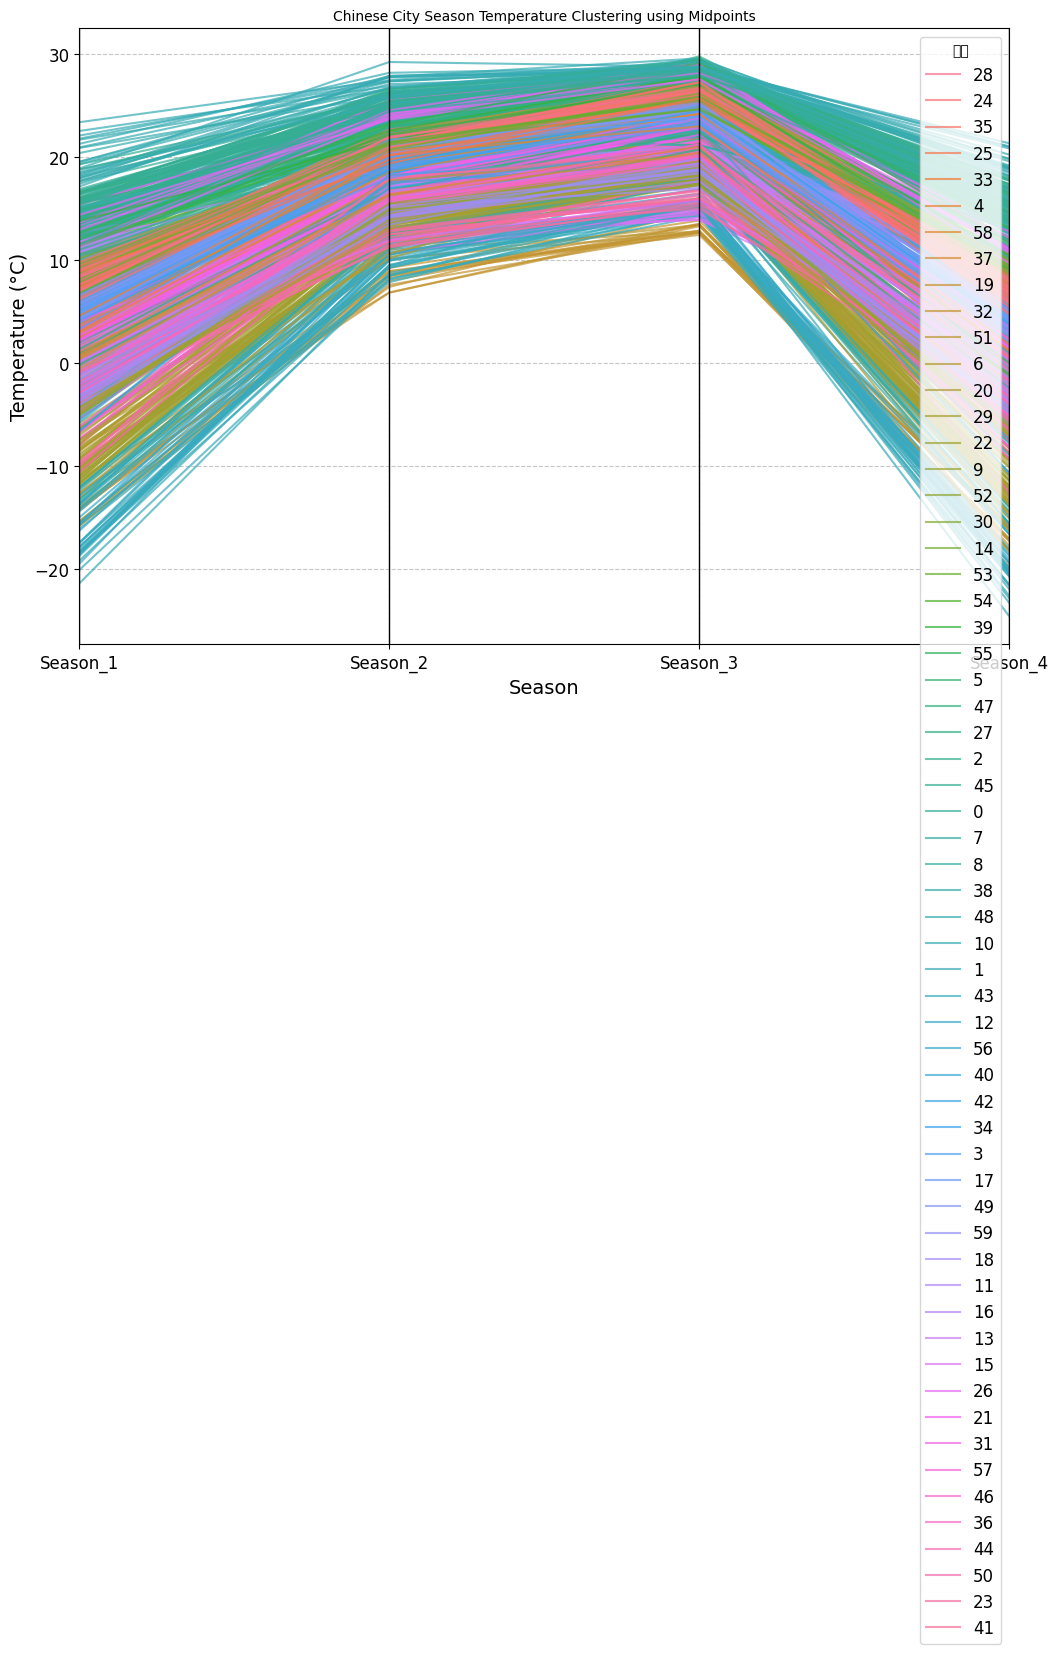

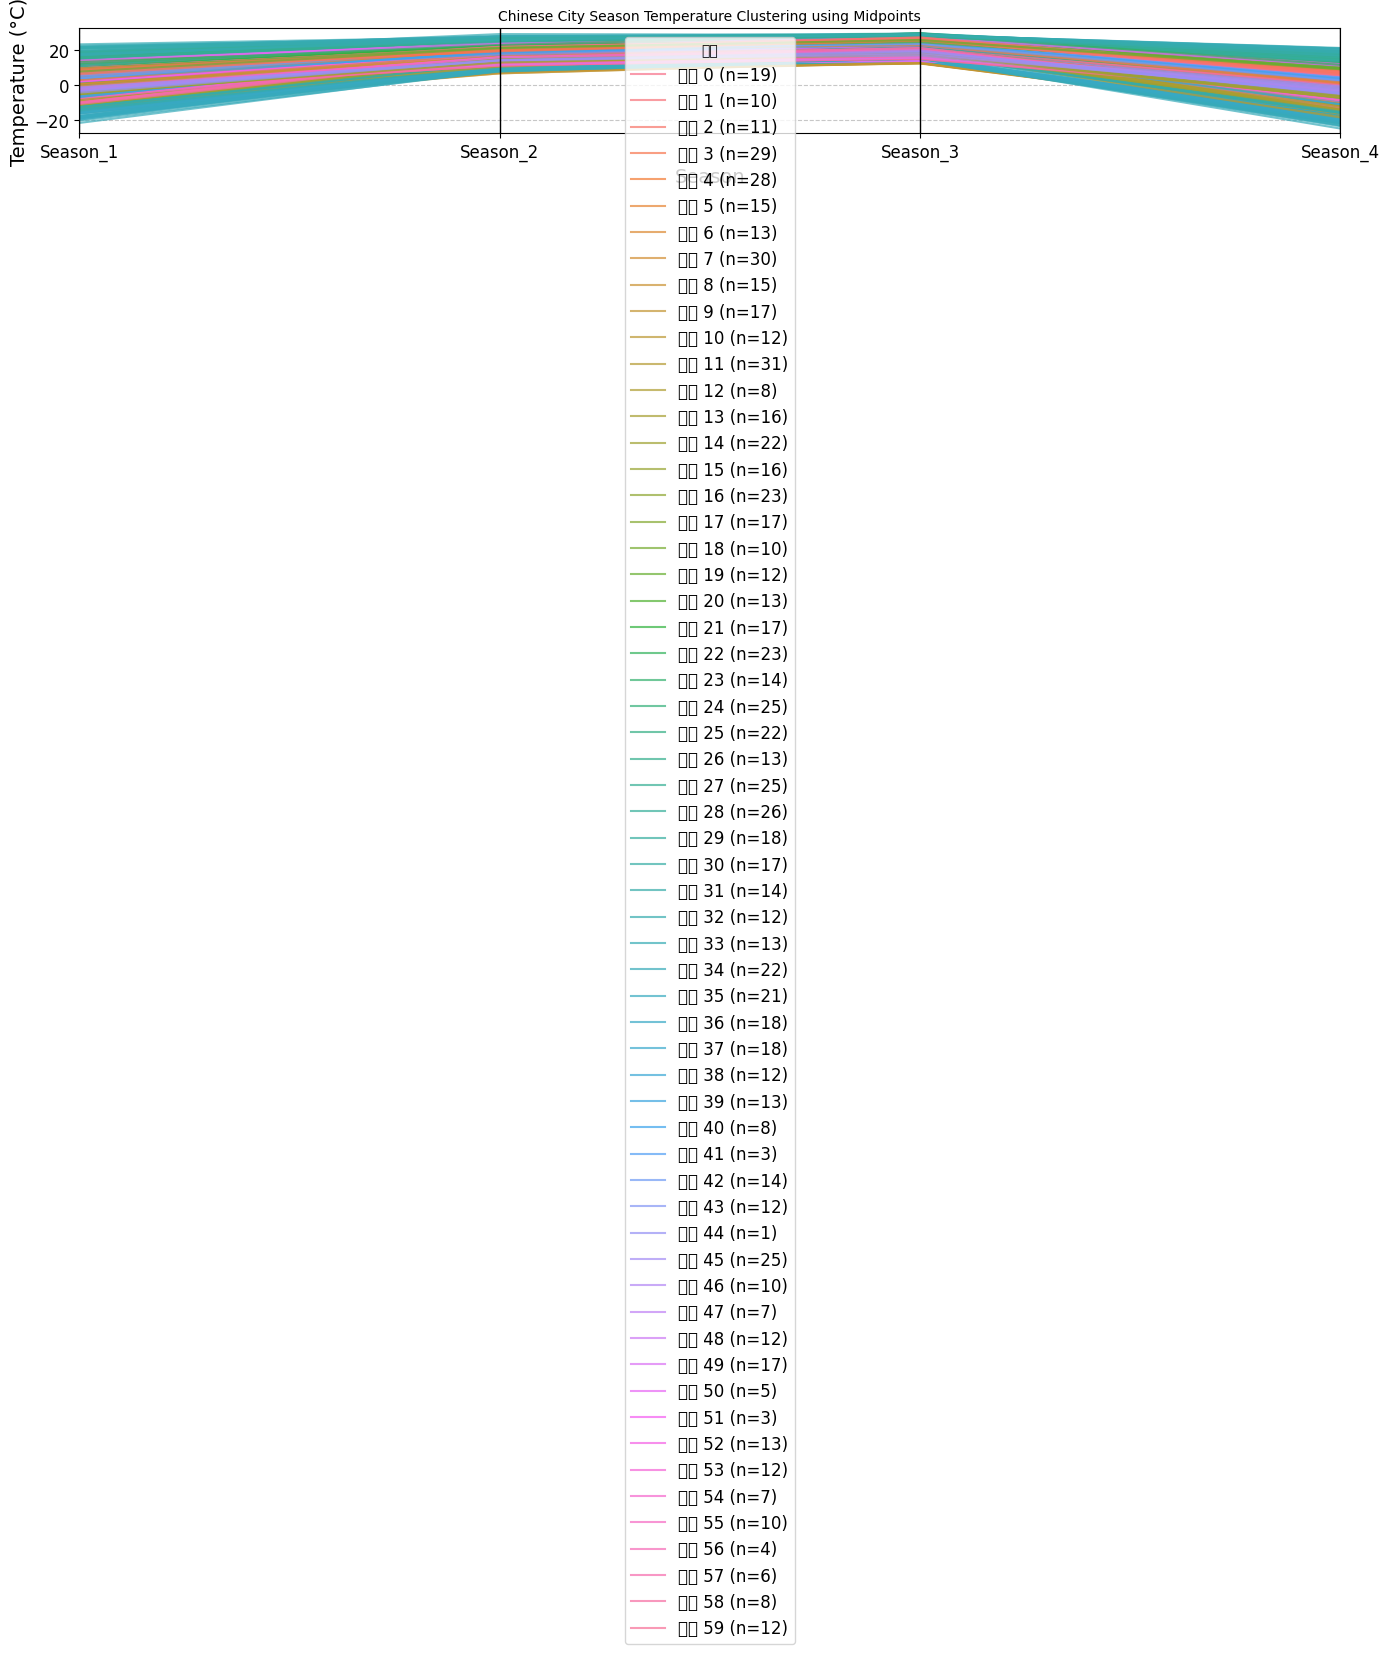

<Figure size 1600x1200 with 0 Axes>

/Users/jiashuchen/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 28201 (\N{CJK UNIFIED IDEOGRAPH-6E29}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiashuchen/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiashuchen/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26149 (\N{CJK UNIFIED IDEOGRAPH-6625}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiashuchen/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23395 (\N{CJK UNIFIED IDEOGRAPH-5B63}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiashuchen/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyp

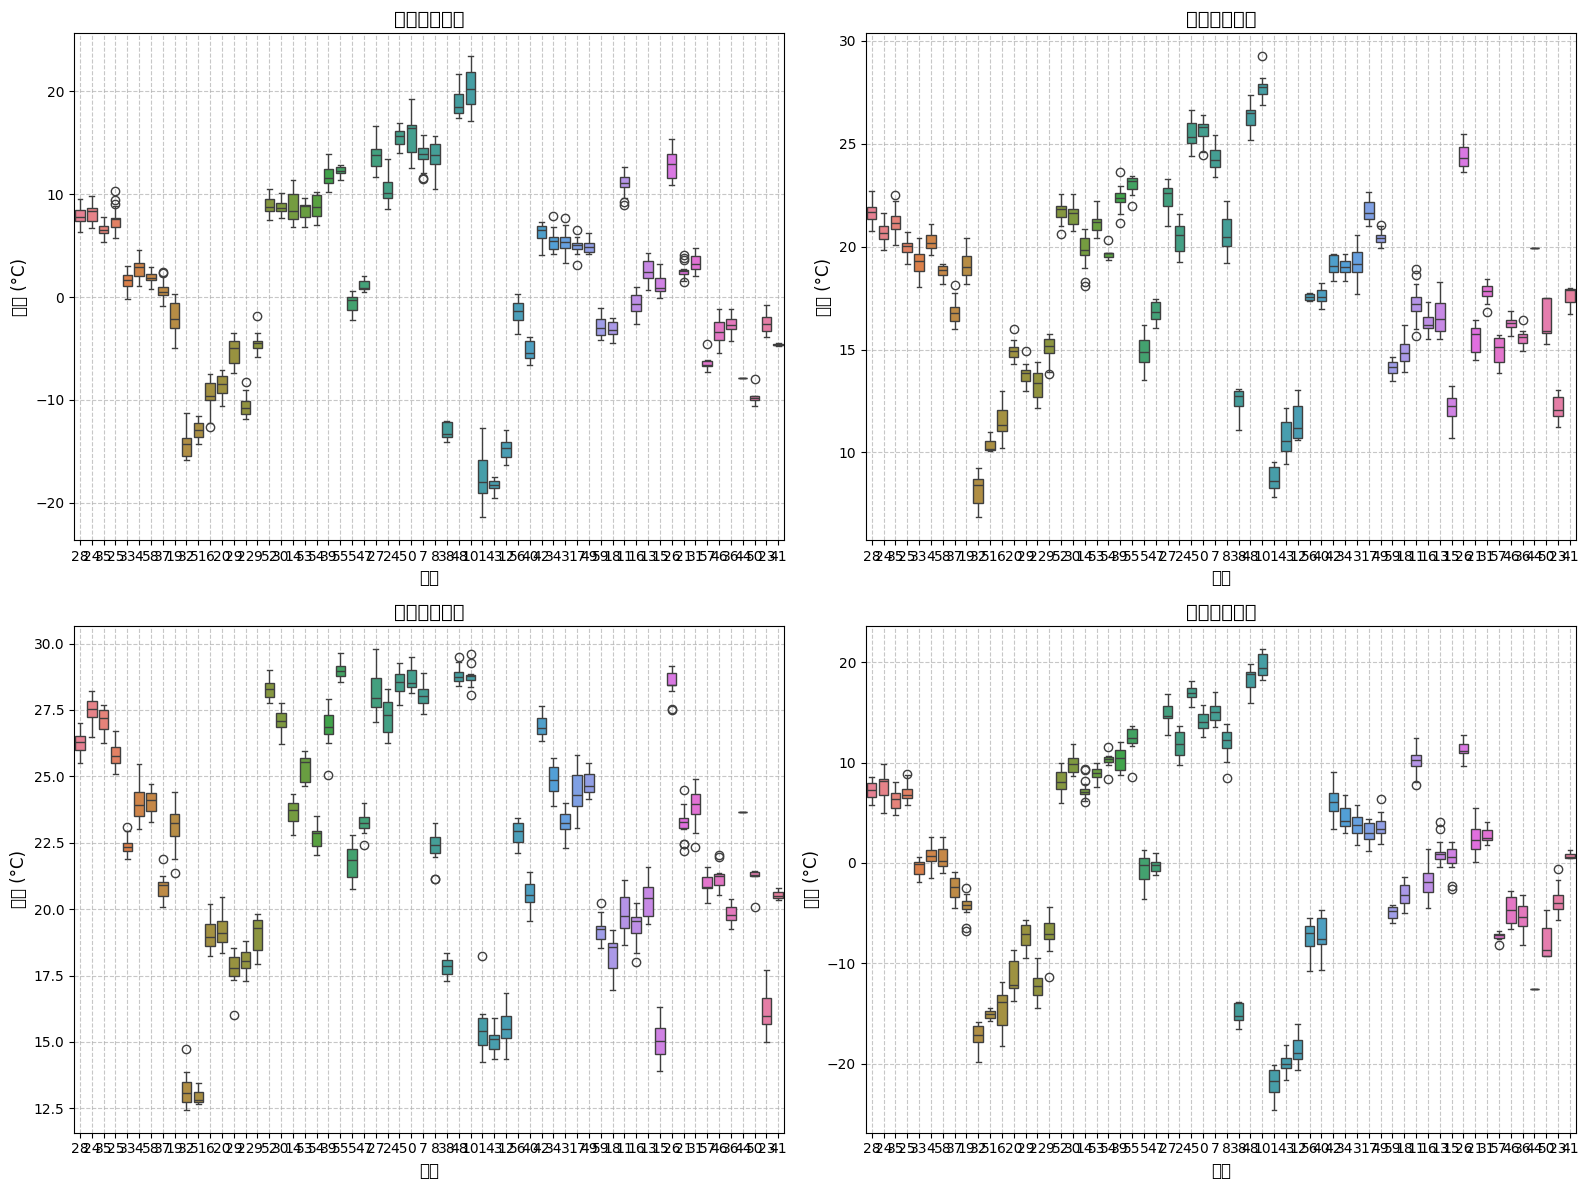

In [39]:
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import seaborn as sns

df['Cluster'] = df['Cluster'].astype(str)

# 设置美观的颜色
colors = sns.color_palette("husl", n_clusters)
plt.figure(figsize=(12, 8))

# 创建平行坐标图
parallel_coordinates(df, 'Cluster', color=colors, alpha=0.7)

# 设置图表标题和标签
plt.title('Chinese City Season Temperature Clustering using Midpoints', fontsize=10)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='聚类', loc='best', fontsize=12)

# 保存图片
plt.tight_layout()
plt.savefig('china_temp_parallel_coordinates.png', dpi=300)
print("\n已保存平行坐标图到 china_temp_parallel_coordinates.png")

# 创建带有样本数量信息的平行坐标图
plt.figure(figsize=(14, 10))

# 创建平行坐标图，但这次添加样本数量信息到标签
cluster_sizes = df.groupby('Cluster').size()
legend_labels = [f'聚类 {i} (n={cluster_sizes[str(i)]})' for i in range(n_clusters)]

# 使用自定义颜色和标签
parallel_coordinates(df, 'Cluster', color=colors, alpha=0.7)

# 设置图表标题和标签
plt.title('Chinese City Season Temperature Clustering using Midpoints', fontsize=10)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 自定义图例
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, legend_labels, title='聚类', loc='best', fontsize=12)

# 保存图片
plt.tight_layout()
plt.savefig('china_temp_parallel_coordinates_with_counts.png', dpi=300)
print("已保存带样本数的平行坐标图到 china_temp_parallel_coordinates_with_counts.png")

# 创建箱线图来显示各聚类在不同季节的分布
plt.figure(figsize=(16, 12))

# 设置子图布局
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

seasons = ['Season_1', 'Season_2', 'Season_3', 'Season_4']
season_names = ['春季', '夏季', '秋季', '冬季']

for i, (season, season_name) in enumerate(zip(seasons, season_names)):
    # 创建箱线图
    sns.boxplot(x='Cluster', y=season, data=df, palette=colors, ax=axes[i])
    axes[i].set_title(f'{season_name}温度分布', fontsize=14)
    axes[i].set_xlabel('聚类', fontsize=12)
    axes[i].set_ylabel('温度 (°C)', fontsize=12)
    axes[i].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('china_temp_boxplots.png', dpi=300)
print("已保存箱线图到 china_temp_boxplots.png")

print("\n可视化完成!")

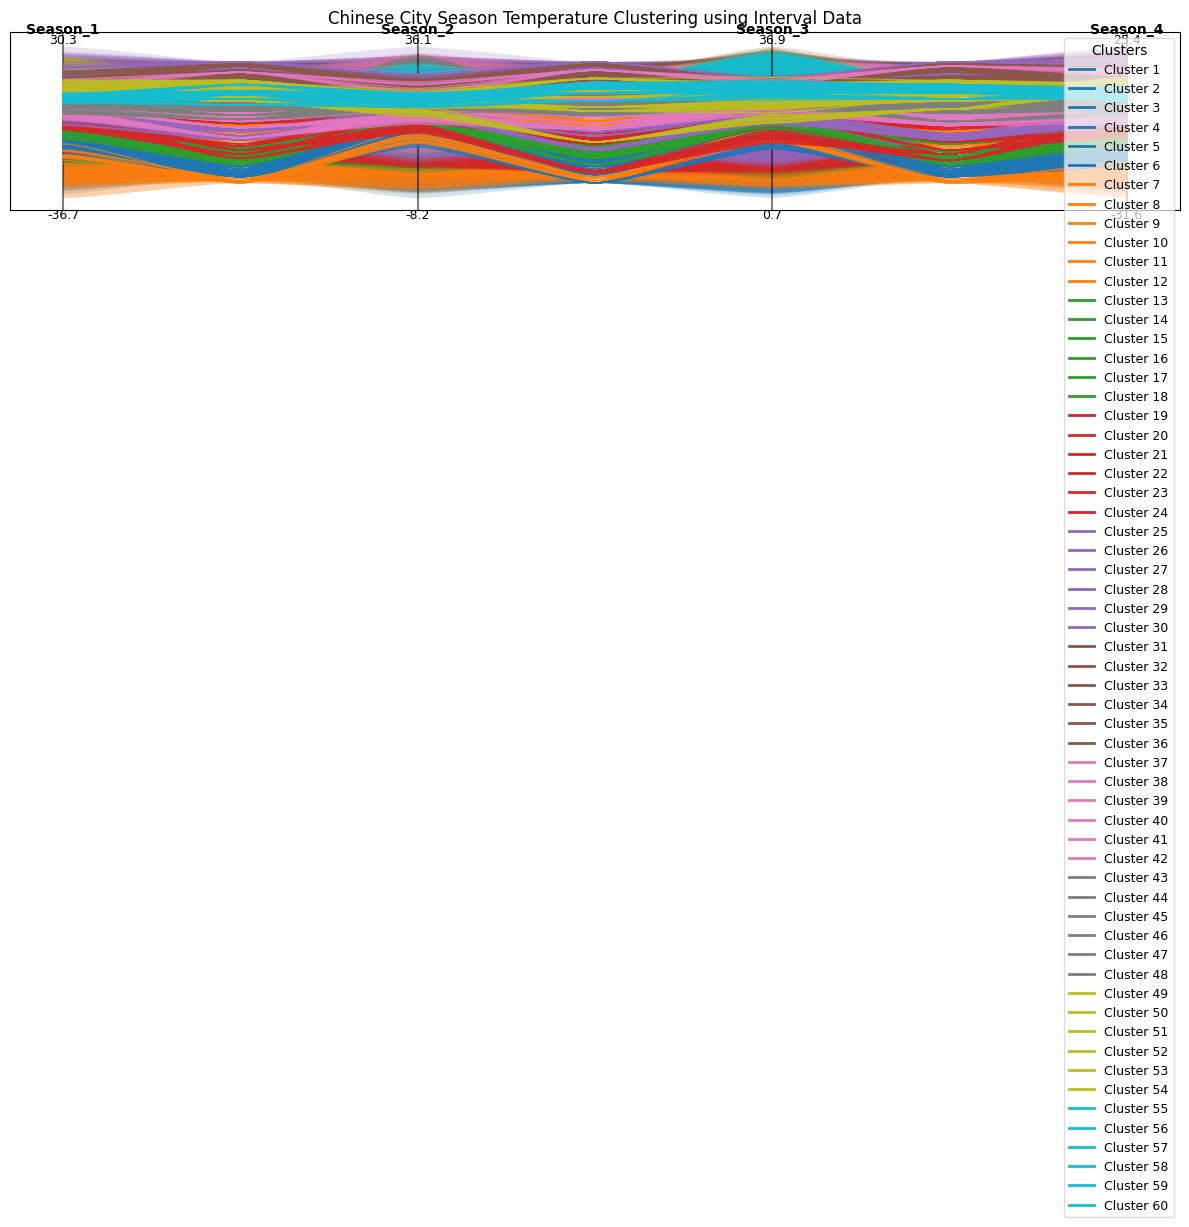

In [40]:
fig, ax = IntervalParallelCoordinates.visualize(intervals = temp_data, labels = hmodel.labels_, beta= 1,  max_samples_per_cluster= 20, title = 'Chinese City Season Temperature Clustering using Interval Data',
                                                feature_names = city_temp.features)

In [41]:

# 文件名
input_file = "ChinaTemp.csv"
output_file = "ChinaTemp_encoded.csv"

# 读取CSV文件
df = pd.read_csv(input_file)

# 显示原始数据信息
print("原始数据形状:", df.shape)
print("原始列名:", df.columns.tolist())

# 创建GeoReg到数字的映射
# 根据分析结果，映射关系如下：
georeg_mapping = {
    "East": 0,
    "North": 1, 
    "Northeast": 2,
    "South_central": 3,
    "Southwest": 4,
    "Northwest": 5
}

# 将GeoReg转换为数字
df['GeoReg_Code'] = df['GeoReg'].map(georeg_mapping)

# 验证转换
print("\n转换后的GeoReg值分布:")
print(df['GeoReg_Code'].value_counts().sort_index())

# 保存到新文件
df.to_csv(output_file, index=False)
print(f"\n已将带有数字编码的数据保存到 {output_file}")

# 将GeoReg_Code提取到单独的数组
georeg_array = df['GeoReg_Code'].values

原始数据形状: (899, 10)
原始列名: ['Unnamed: 0', 'LB_T1', 'UB_T1', 'LB_T2', 'UB_T2', 'LB_T3', 'UB_T3', 'LB_T4', 'UB_T4', 'GeoReg']

转换后的GeoReg值分布:
GeoReg_Code
0    225
1     75
2    135
3    120
4    150
5    194
Name: count, dtype: int64

已将带有数字编码的数据保存到 ChinaTemp_encoded.csv


In [42]:
print(georeg_array)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [43]:
city_encoding = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,53,53,53,53,53,53,53,53,53,53,53,53,53,53,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59]

In [44]:
print(hmodel.labels_)

[59 57 59 55 54 59 58 56 59 57 56 57 59 59 54 40 41 40 42 40 40 40 41 40
 41 40 40 40 42 42 25 40 25 42 40 25 25 41 40 41 40 40 40 42 42  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  0 16  0  0 16 15  1 16 16 16 16  1
 16 16 16 55 57 59 55 54 53 59 56 59 57 56 57 56 59 54 51 50 51 50 50 50
 50 51 51 51 51 51 50 51 51 53 53 53 53 30 53 53 53 53 53 53 53 53 53 53
 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 31 29 31 29 31 36 31 29 34
 29 31 34 31 31 31 33 32 33 33 33 33 33 32 32 29 29 35 33 32 36 51 50 51
 51 51 51 51 51 51 51 51 51 51 51 51  3 16  3  3  1  0  1  0  1  2  1  3
  1  1  0 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28  7  7  8  8  7  7
  7  7  7  6  7  7  5  7  7  9 11 11  9  9  9  9  9  9  9 11  9  9  9  9
 59 57 59 55 54 59 58 59 59 57 56 57 59 59 54 44 43 44 44 43 44 44 44 44
 44 44 44 44 44 45 15 13 15 15 14 15 14 13 15 16 15 15 14 19 15 47 47 47
 47 47 46 47 47 47 47 42 47 47 43 47 14 14 14 12 26 14 12 13 14 15 14 12
 14 12 12 49 49 49 49 49 49 49 49 49 49 49 49 49 49

In [45]:
from sklearn.metrics import accuracy_score
from scipy.optimize import linear_sum_assignment
import numpy as np
from sklearn import metrics
import numpy as np

def cluster_accuracy(y_true, y_pred):
    """
    计算聚类结果的准确度，通过寻找最佳标签映射
    """
    # 创建混淆矩阵
    contingency = metrics.cluster.contingency_matrix(y_true, y_pred)
    
    # 找到最佳映射
    row_ind, col_ind = linear_sum_assignment(-contingency)
    
    # 创建映射字典
    mapping = {col_ind[i]: row_ind[i] for i in range(len(col_ind))}
    
    # 将预测标签映射到真实标签
    mapped_predictions = np.array([mapping[label] for label in y_pred])
    
    # 计算准确度
    return accuracy_score(y_true, mapped_predictions)

In [46]:
acc = cluster_accuracy(city_encoding, hmodel.labels_)
print(f"聚类准确度_1: {acc}")

acc = cluster_accuracy(city_encoding, cluster_labels)
print(f"聚类准确度_2: {acc}")

聚类准确度_1: 0.5339265850945495
聚类准确度_2: 0.4649610678531702


In [62]:
ari = metrics.adjusted_rand_score(city_encoding, hmodel.labels_)
print(f"调整兰德指数: {ari}")

ari = metrics.adjusted_rand_score(city_encoding, cluster_labels)
print(f"调整兰德指数: {ari}")

调整兰德指数: 0.4091632977682184
调整兰德指数: 0.33508711657787776


In [73]:
nmi = metrics.normalized_mutual_info_score(city_encoding, hmodel.labels_)
print(f"归一化互信息: {nmi}")

nmi = metrics.normalized_mutual_info_score(city_encoding, cluster_labels)
print(f"归一化互信息: {nmi}")

归一化互信息: 0.7516903249717183
归一化互信息: 0.7183861727011263


In [64]:
kmeans = IntervalKMeans(n_clusters=60)
kmeans.fit(temp_data_processed)
print(kmeans.labels_)

acc = cluster_accuracy(city_encoding, kmeans.labels_)
print(f"聚类准确度_1: {acc}")

[32 45 58 32  3 32 58 18 58 45 18 45 32 58  3 36  4 36 36  4 36  4  4 36
  4  4 36  4  4 59 36 36  7 36 36 41 41  4 36  4 36 36 36 59 59 48 48 48
 48 48 48 48 48 48 48 48 48 48 48 48 28 46 28 28 56 46 22 46 56 46 56 56
 46 56 46 32 45  3 32  3 35  3 18  3 45 18  3 32  3  3 11 32 11 39 39 39
 39 11 11 39 11 39 39 11 39 19 27 19 19  1 19 19 19 19 19 19 19 19 19 19
 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 10  9 10 44 10 10 31 10 10
  9 31 10 10 10 31 25 33  5 25 25 25 25 23 33 33 51  5 25 23 44 11 11 11
 11 11 11 11 11 11 11 11 11 11 11 39 57 56 57 57 22 22 22 56 56 28 22 57
 22 22 22  8 37  8 37 37 37 37 37 37  8  8  8 37 37  8 48 48 48 48 48 48
 48 48 48 48 48 48 48 48 48 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24
 58 45  3 32  3  3 58 18 58 45 18 45 32 58  3 30  2 15 30 30 30 15 30 15
 15 30 15 30 15 15  6  6 46  6  6  6  6  6 46 46 46 46  6 17  6 20 38 43
 54 38 43 20 54 54 38 59 20 54  2 38  6  6  6 53 16  6 16  6 16  6  6 16
 16 16 16 34 34 34 34 34 34 34 34 34 34 34 34 34 34

In [70]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans_cluster_labels = kmeans.fit_predict(X_scaled)

acc = cluster_accuracy(city_encoding, kmeans_cluster_labels)
print(f"聚类准确度_1: {acc}")

预测标签的唯一值: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]
真实标签的唯一值: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]
聚类准确度_1: 0.457174638487208


In [68]:
ari = metrics.adjusted_rand_score(city_encoding, kmeans.labels_)
print(f"调整兰德指数: {ari}")

ari = metrics.adjusted_rand_score(city_encoding, kmeans_cluster_labels)
print(f"调整兰德指数: {ari}")

调整兰德指数: 0.34150139146899444
调整兰德指数: 0.34150139146899444


In [74]:
nmi = metrics.normalized_mutual_info_score(city_encoding, kmeans.labels_)
print(f"归一化互信息: {nmi}")

nmi = metrics.normalized_mutual_info_score(city_encoding, kmeans_cluster_labels)
print(f"归一化互信息: {nmi}")

归一化互信息: 0.7254337614494395
归一化互信息: 0.7254337614494395


In [50]:
fuzzyc = IntervalFuzzyCMeans(n_clusters=n_clusters, adaptive_weights=True, max_iter=100)

fuzzyc.fit(temp_data_processed)

fuzzyclabels = fuzzyc.crisp_label

print(fuzzyclabels)

[41 20 41  8 16 30 41 30 41 20 30 30 30 20  4 23 23 23 39 23 23 23 23 23
 39 23 23 23 39 39 26 23 26 59 23 26 26 23 23 39 23 23 23 59 39 56 56 56
 56 56 56 56 56 56 56 56 56 56 56 56  2  2 53 53  2  2 53  2  2  2  2 53
  2  2  2 16 36 16  8 36 36 16 16 16 16 16 16 16  4 36 49 20 49 49 49 49
 49 49 49 49 49 49 49 49 49 19 21  8 19 19 19 19 19  8  8  8  8 19  8  8
 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 19 21 19 27 19 18 19 15 19
 21 19 19 19 15 15 46 45 28 31 45 45 45 45 27 46 27 28 45 45 45 49 49 49
 49 49 49 49 49 49 41 49 49 49 49 49 47  2 47 47 12 53 12  2 35 53 47 47
 12 12 53 31 22 31 22 22 22 22 22 22 31 31 31 22 22 31  6 40  6  6  6  6
  6 40  6  6  6 40 29  6  6 37 37 13 42 37 37 37 37 37 42 37 37 42 37 37
 20 41 41  8 16 36 41 30 41 41 11 41 20 41 16 11 11 10 11 11 11 11 32 32
 11 11 32 11 32 32  2 51  2 57 57 57 57 51 57 51  2  2 57 13 57 24 38 24
 38 32 38 24 38 17 38 24  9 38 10 10  0  3 57 13 51 57 57 25 57 57 57 44
  3  3  0 58 58 58 58 58 58 58 58 58 58 58 58 58  1

In [56]:
def cluster_accuracy(y_true, y_pred):
    from sklearn.metrics import accuracy_score
    from scipy.optimize import linear_sum_assignment
    import numpy as np
    
    # 确保输入是numpy数组
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # 获取标签的唯一值
    pred_labels = np.unique(y_pred)
    true_labels = np.unique(y_true)
    
    print(f"预测标签的唯一值: {pred_labels}")
    print(f"真实标签的唯一值: {true_labels}")
    
    # 创建成本矩阵
    cost_matrix = np.zeros((len(true_labels), len(pred_labels)))
    
    for i, true_label in enumerate(true_labels):
        for j, pred_label in enumerate(pred_labels):
            # 计算预测为pred_label但实际为true_label的样本数
            cost_matrix[i, j] = -np.sum((y_pred == pred_label) & (y_true == true_label))
    
    # 使用匈牙利算法找到最优匹配
    row_ind, col_ind = linear_sum_assignment(cost_matrix)
    
    # 创建映射字典
    mapping = {pred_labels[j]: true_labels[i] for i, j in zip(row_ind, col_ind)}
    
    # 将预测标签映射到真实标签
    mapped_predictions = np.array([mapping.get(label, -1) for label in y_pred])
    
    # 找出有效映射的索引
    valid_indices = np.where(mapped_predictions != -1)[0]
    
    # 如果没有有效映射，返回0
    if len(valid_indices) == 0:
        return 0.0
    
    # 使用索引数组而不是布尔掩码
    return accuracy_score(y_true[valid_indices], mapped_predictions[valid_indices])

In [59]:
import skfuzzy as fuzz
X_scaled_transposed = X_scaled.T

# 使用Fuzzy C-Means聚类
# m是模糊系数，控制聚类的"模糊度"，值越大越模糊
# 通常m的值在1.5到3.0之间
m = 2.0

# 执行Fuzzy C-Means聚类
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_scaled_transposed, 60, m, error=0.005, maxiter=1000, init=None
)

# 获取每个样本的主要聚类（最大隶属度对应的聚类）
fuzzylabels = np.argmax(u, axis=0)

In [60]:
print(fuzzylabels)

[43  0 25 41  0 41 57 41 57  0 25 25 43 46  0  7 52  7 24 24 10 24 52 24
 52 24  7 24 24 24 35  7 35 10  7 35 35 52  7 52  7  7  7 10 24 27 20 27
 27 27 20 27 20 20 20 27 27 20 27 20 44 31 44 44 39 45 44 39 39 45 39 44
 45 39  8 53  0 41 26 26 26 41 53 46  0 53  0 53 59 26 33 43  1 43 33 33
 33 33 33  1 33  1 33 33 33 16  9 26 16  9 16 16 16 59 26 53 26 16 16 16
  6  6  3  6  6  6 38  6  6 10  6 38  3  6  6 21  9 16 21  9 21  9  9 16
  9  9 16  9 21  9 18  5 11 56 18 18 18 56 11  5  5 11 56 18 18  1 33  1
 33 33 33 33 33 33  1  1  1 33 17 33 50 39 50 50 39 44 32 39 39 44 32 32
 44 32 39 30 29 30 29 29 29 29 29 29 30 30 30 29 29 29 40 49 40 40 49 49
 40 42 42 40 40 49 47 49 42  7 23 31  7  7 35  7  7  7 23 23  7  7  7  7
 57  0 25  0  0 59 57 43 57 25 25 25 46 46  0  1 19 12  1 19  1 12 54 12
 12 12 55 12 55 54 45  8 45  4  4 45 45  8  4  8 45 45  4  8  4 28 28 22
 28 28 54 52 28 28 28 52 52 28 28 28 14 37  4 37 34  4 37 14 37  4  4 37
 37 37 37 48 48 48 48 48 48 48 48 48 48 48 48 48 48

In [61]:
acc = cluster_accuracy(city_encoding, fuzzyclabels)
print(f"聚类准确度_1: {acc}")

acc = cluster_accuracy(city_encoding, fuzzylabels)
print(f"聚类准确度_2: {acc}")

预测标签的唯一值: [ 0  1  2  3  4  6  8  9 10 11 12 13 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 44 45 46 47 48 49 50 51
 52 53 55 56 57 58 59]
真实标签的唯一值: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]
聚类准确度_1: 0.43159065628476084
预测标签的唯一值: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]
真实标签的唯一值: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]
聚类准确度_2: 0.42936596218020023


In [71]:
ari = metrics.adjusted_rand_score(city_encoding, fuzzyclabels)
print(f"调整兰德指数: {ari}")

ari = metrics.adjusted_rand_score(city_encoding, fuzzylabels)
print(f"调整兰德指数: {ari}")

调整兰德指数: 0.33341494007343464
调整兰德指数: 0.31155148986822706


In [75]:
nmi = metrics.normalized_mutual_info_score(city_encoding, fuzzyclabels)
print(f"归一化互信息: {nmi}")

nmi = metrics.normalized_mutual_info_score(city_encoding, fuzzylabels)
print(f"归一化互信息: {nmi}")

归一化互信息: 0.7137216694809555
归一化互信息: 0.7016751638523081
